1/1 [==============================] - 0s 166ms/step


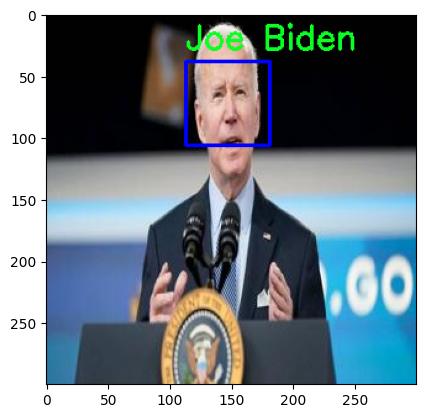

Attendance:
Joe Biden: 1


In [1]:
from keras.preprocessing import image
from keras.models import load_model
model = load_model("D:\Visual studio\Course\Deep Learning\Jupyter Notebook\Leaders_new_model\Leaders_new_mode.h5")


import cv2
from matplotlib import pyplot as plt
from keras.preprocessing import image
import numpy as np

attendance = {}

def mark_attendance(label):
    if label in attendance:
        attendance[label] += 1
    else:
        attendance[label] = 1

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
show_image_path = r"D:\Visual studio\Course\Deep Learning\Jupyter Notebook\Leader_quad\Data\Joe Biden\JoeBiden2.jpg"
cv_image = cv2.imread(show_image_path)
gray_image = cv2.cvtColor(cv_image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

for (x, y, w, h) in faces:
    cv2.rectangle(cv_image, (x, y), (x+w, y+h), (255, 0, 0), 2)
    face_roi = gray_image[y:y+h, x:x+w]
    test_image = image.load_img(show_image_path,target_size=(64,64,3))
    resized_face = cv2.resize(face_roi, (64,64))
    test_image = image.img_to_array(test_image)
    test_image =np.expand_dims(test_image,axis=0)
    result = model.predict(test_image)

    if result[0][0] == 1:
        label = 'Narendra Modi'
    else:
        label = 'Joe Biden'
    mark_attendance(label)
    
    cv2.putText(cv_image, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

plt.imshow(cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB))
plt.show()

print("Attendance:")
for person, count in attendance.items():
    print(f"{person}: {count}")


In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as Image
from keras.preprocessing import image
from keras.models import load_model
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from  sklearn.metrics import confusion_matrix
from datetime import datetime

trian_dir = os.path.join('data')
all_labels = []
all_classifications = []
class_names = []

for folder in os.listdir(trian_dir):
    class_names.append(folder)
    for image_path in os.listdir(os.path.join(trian_dir,folder)):
        img = Image.open(os.path.join(trian_dir,folder,image_path))
        if img.mode != 'RGB':
            img.convert('RGB')
        arr = np.array(img)
        resized_img = Image.fromarray(arr).resize((64,64))
        resized_arr = np.array(resized_img)
        all_labels.append(resized_arr)
        all_classifications.append(folder)
        

encoder = LabelEncoder()
X = np.array(all_labels)
X = X/255.0
y = np.array(all_classifications)
y = encoder.fit_transform(y)
y = to_categorical(y,len(class_names))

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.9,random_state=42)

model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=(X.shape[1],X.shape[2],3),activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(len(class_names),activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=100,validation_split=0.1,batch_size=64)

attendance = {}
def Classattendance(label): 
    date = datetime.now().strftime("%Y-%m-%d")
    time = datetime.now().strftime("%H:%M:%S")
    
    if label in attendance:
        if date in attendance[label]["date"]:
            pass
        else:
            attendance[label]["date"].append(date)
            attendance[label]["time"].append(time)
    else:
        attendance[label] = {"date": [date], "time": [time]}

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0) 

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    for (x, y, w, h) in faces:
        face_roi = gray_frame[y:y+h, x:x+w] 
        resized_face = cv2.resize(face_roi, (64, 64)) 
        
        rgb_face = cv2.cvtColor(resized_face, cv2.COLOR_GRAY2RGB)
        
        test_image = image.img_to_array(rgb_face) 
        test_image = np.expand_dims(test_image, axis=0)  
        result = model.predict(test_image)  
        result = np.argmax(result,axis=1)
        label = [class_names[idx] for idx in result]
        Classattendance(label) 
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2) 
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2) 
    
    cv2.imshow('Student camera', frame) 
    
    if len(attendance) == len(class_names):
        break

cap.release()
cv2.destroyAllWindows()

print(f"Attendance : {datetime.now().strftime('%d-%m-%Y')}")
print('------------------------')
print()
for student_number, (person, info) in enumerate(attendance.items(), start=1):
    print(f"No. {student_number}\nStudent name - {person} \nEntry time - {', '.join(info['time'])}\n")


1/1 [==============================] - 0s 100ms/step
Attendance : 06-05-2024
------------------------

No. 1
Student name - Joe Biden 
Entry time - 18:12:36


In [38]:
from keras.preprocessing import image
from keras.models import load_model
import cv2
import numpy as np
from datetime import datetime

model = load_model("D:\Visual studio\Course\Deep Learning\Jupyter Notebook\Leaders_new_model\Leaders_new_mode.h5")
attendance = {}
def Classattendance(label): 
    date = datetime.now().strftime("%Y-%m-%d")
    time = datetime.now().strftime("%H:%M:%S")
    
    if label in attendance:
        if date in attendance[label]["date"]:
            pass
        else:
            attendance[label]["date"].append(date)
            attendance[label]["time"].append(time)
    else:
        attendance[label] = {"date": [date], "time": [time]}

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0) 

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    for (x, y, w, h) in faces:
        face_roi = gray_frame[y:y+h, x:x+w] 
        resized_face = cv2.resize(face_roi, (64, 64)) 
        
        rgb_face = cv2.cvtColor(resized_face, cv2.COLOR_GRAY2RGB)
        
        test_image = image.img_to_array(rgb_face) 
        test_image = np.expand_dims(test_image, axis=0)  
        result = model.predict(test_image)  
        
        if result[0][0] == 1:
            label = 'Student 1'
        else:
            label = 'Student 2'
        Classattendance(label) 
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2) 
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2) 
    
    cv2.imshow('Attendance Tracking', frame) 
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
    if len(attendance) == 2:
        break

cap.release()
cv2.destroyAllWindows()

print(f"Attendance : {datetime.now().strftime('%d-%m-%Y')}")
print('------------------------')
print()
for student_number, (person, info) in enumerate(attendance.items(), start=1):
    print(f"No. {student_number}\nStudent name - {person} \nEntry time - {', '.join(info['time'])}\n")



1/1 [==============================] - 0s 16ms/step
Attendance : 06-05-2024
------------------------

No. 1
Student name - Student 1 
Entry time - 19:05:01

No. 2
Student name - Student 2 
Entry time - 19:05:03

